In [13]:
import torch
from PIL import Image
import requests
import matplotlib.pyplot as plt
from transformers import CLIPProcessor, CLIPModel

In [14]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

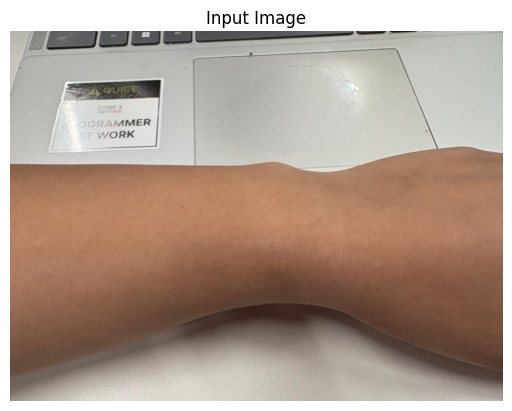

In [29]:
input_path="arm_okay2.jpg"
image = Image.open(input_path).convert("RGB")


plt.imshow(image)
plt.axis("off")
plt.title("Input Image")
plt.show()

In [21]:
texts = ["a photo of a healthy arm", "a photo of an injured arm"]

In [30]:
inputs = processor(text=texts, images=image, return_tensors="pt", padding=True).to(device)
outputs = model(**inputs)

In [31]:
probs = outputs.logits_per_image.softmax(dim=1).detach().cpu().numpy()[0]

In [32]:
for label, prob in zip(texts, probs):
    print(f"{label}: {prob:.4f}")

prediction = texts[probs.argmax()]
print("\n>>> Prediction:", prediction)

a photo of a healthy arm: 0.6497
a photo of an injured arm: 0.3503

>>> Prediction: a photo of a healthy arm
